# Importing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# Uploading Files

In [6]:
data = pd.read_csv('Market_Sales Data.csv', encoding= 'unicode_escape')

# Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
data.shape

(11251, 15)

In [10]:
data.drop(['Status', 'unnamed1'] , axis=1 , inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
data = data.dropna(subset=['Amount'])

In [15]:
data.isnull().sum()


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [18]:
data['Marital_Status']

0        0
1        1
2        1
3        0
4        1
        ..
11246    1
11247    0
11248    0
11249    0
11250    0
Name: Marital_Status, Length: 11239, dtype: int64

In [19]:
data['Marital_Status'] = data['Marital_Status'].fillna(0)

In [20]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# Data Visualization

# Question 1: What is the total amount spent by each age group?

In [9]:
Age_Group = data.groupby('Age Group')['Amount'].sum().reset_index()

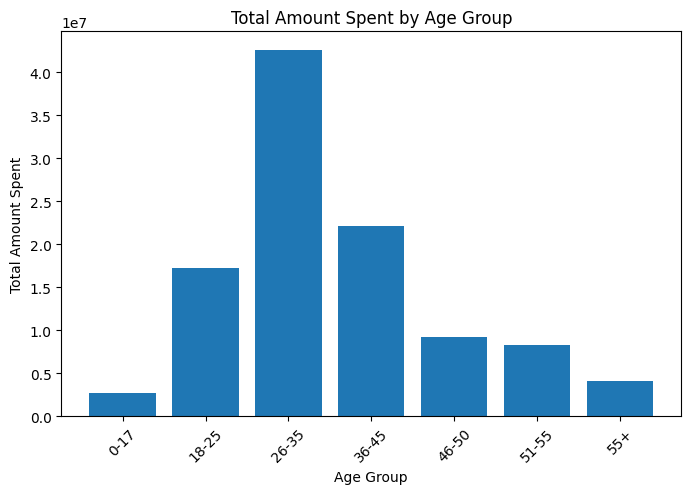

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(Age_Group['Age Group'], Age_Group['Amount'])
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Age Group')
plt.xticks(rotation=45)
plt.show()

This will show how much each age group is contributing to the total sales. For example, the age group "26-35" may contribute the most to the sales, which could indicate a key demographic for marketing campaigns targeting young professionals.

# Question 2: What is the distribution of orders based on gender?

In [35]:
Gender_Orders = data.groupby('Gender')['Orders'].sum().reset_index()

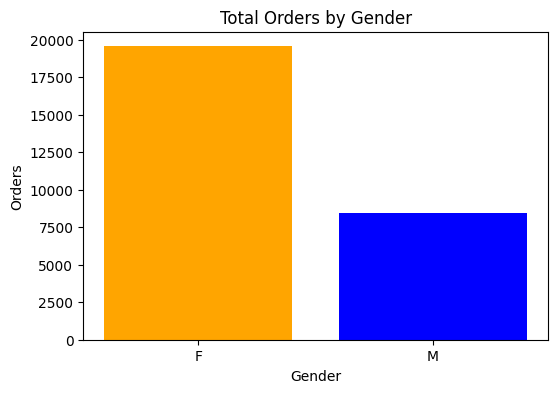

In [40]:
plt.figure(figsize=(6,4))
bar_colors = ['orange', 'blue'] 
plt.bar(Gender_Orders['Gender'],Gender_Orders['Orders'], color =bar_colors)
plt.xlabel('Gender')
plt.ylabel('Orders')
plt.title('Total Orders by Gender')
plt.show()

This visualization will help identify if there is a gender difference in the number of orders. For instance, if the data shows that females have placed more orders than males, this could suggest gender-based preferences or marketing effectiveness.

# Question 3: How do orders vary across different states?

In [47]:
States_Group = data.groupby('State')['Orders'].sum().reset_index()
States_Group = States_Group.sort_values('Orders', ascending=False)

In [48]:
print(States_Group)

               State  Orders
14     Uttar Pradesh    4807
10       Maharashtra    3810
7          Karnataka    3240
2              Delhi    2740
9     Madhya Pradesh    2252
0     Andhra Pradesh    2051
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1066
1              Bihar    1062
6          Jharkhand     953
15       Uttarakhand     824
12         Rajasthan     555
11            Punjab     495
13         Telangana     312


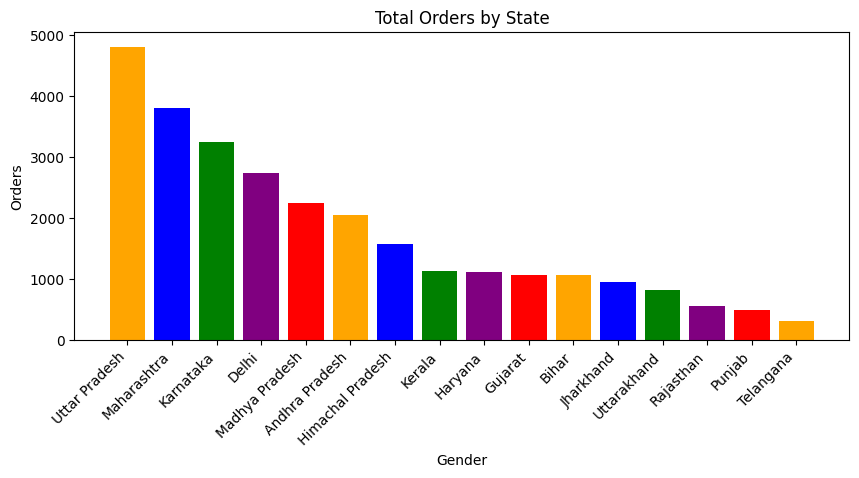

In [53]:
plt.figure(figsize=(10,4))
bar_colors = ['orange', 'blue', 'green', 'purple', 'red']
plt.bar(States_Group['State'],States_Group['Orders'], color =bar_colors)
plt.xlabel('Gender')
plt.ylabel('Orders')
plt.title('Total Orders by State')
plt.xticks(rotation=45, ha='right')
plt.show()

This shows which states have the highest number of orders. For instance, if Uttar Pradesh, Maharashtra & Karnataka has the highest number of orders, then it could indicate a high demand for products in that region, potentially guiding location-based marketing efforts.

# Question 4: What is the average spending amount by marital status?

In [67]:
marital_status_spend = data.groupby('Marital_Status')['Amount'].mean().reset_index()

In [68]:
print(marital_status_spend)

  Marital_Status       Amount
0        Married  9346.271127
1         Single  9531.357232


In [62]:
data['Marital_Status'] = data['Marital_Status'].replace({0: 'Single', 1: 'Married'})

In [66]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


C:\Users\91868\AppData\Local\Temp\ipykernel_17036\2856712513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital_Status', y='Amount', data=data, palette='muted')


Text(0.5, 1.0, 'Spending Distribution by Marital Status')

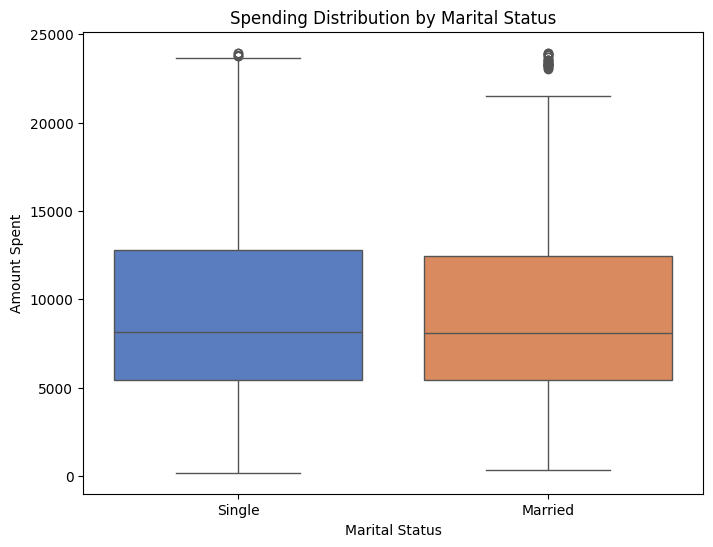

In [72]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital_Status', y='Amount', data=data, palette='muted')
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent')
plt.title('Spending Distribution by Marital Status')



This analysis will help understand whether marital status impacts spending behavior. If married individuals tend to spend more on average, businesses can tailor their offerings to target married couples with more premium or family-oriented products.

In [73]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [75]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [77]:
distinct_categories = data['Product_Category'].unique()
print(distinct_categories)

['Auto' 'Hand & Power Tools' 'Stationery' 'Tupperware' 'Footwear & Shoes'
 'Furniture' 'Food' 'Games & Toys' 'Sports Products' 'Books'
 'Electronics & Gadgets' 'Decor' 'Clothing & Apparel' 'Beauty'
 'Household items' 'Pet Care' 'Veterinary' 'Office']


# Question 5: Which product category generates the highest sales?

In [85]:
Category_Sales = data.groupby('Product_Category')['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(5)

In [86]:
print(Category_Sales)

        Product_Category       Amount
6                   Food  33933883.50
3     Clothing & Apparel  16495019.00
5  Electronics & Gadgets  15643846.00
7       Footwear & Shoes  15575209.45
8              Furniture   5440051.99


C:\Users\91868\AppData\Local\Temp\ipykernel_17036\906305531.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x= 'Amount', y = 'Product_Category', data=Category_Sales, kind='bar', height=6, aspect=2, palette='Blues_d'  )


Text(0.5, 1.0, 'Top 5 Product Categories by Total Sales')

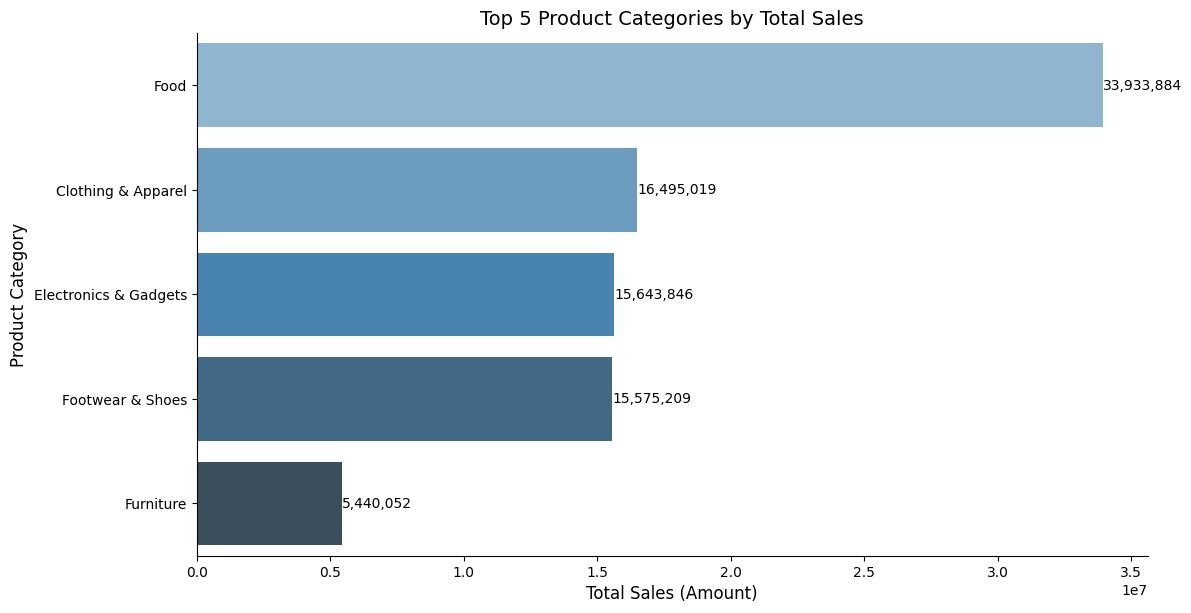

In [90]:
sns.catplot(x= 'Amount', y = 'Product_Category', data=Category_Sales, kind='bar', height=6, aspect=2, palette='Blues_d'  )
for index, value in enumerate(Category_Sales['Amount']):
    plt.text(value, index, f'{value:,.0f}', color='black', ha="left", va="center", fontsize=10)
plt.xlabel('Total Sales (Amount)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.title('Top 5 Product Categories by Total Sales', fontsize=14)

This will allow us to see which product category is driving the most sales. For instance, if the "Auto" category has the highest sales, it suggests that products in this category are most popular and generate the highest revenue

# Above Data Visualization insight :

# 1.	Age Group Insights:

🎯: Focus marketing efforts on the 26-35 age group, as they contribute the most to sales.

💡: This group likely represents young professionals with higher disposable income, ideal for targeting with special offers.

📊: Moderate spending from 36-45 and 18-25 groups – don't ignore them but allocate resources effectively.

📉: Lower sales from older age groups (51-55, 55+) may suggest less consumer spending.

⚠️: Investigate outliers (red dots) to understand if they represent significant events or data anomalies.

🔄: Adjust inventory and promotions based on the most popular age groups.

# 2. Gender Analysis:

👩‍🦰: Females (F) are the dominant group in placing orders, with a much higher total compared to males.

🧑‍🦰: Males (M) are ordering significantly less, which could indicate an area for improvement in engagement or marketing.

🎯: Focus marketing strategies on female customers, as they are driving the majority of orders.

📦: Adjust inventory to meet the demand from females, ensuring products targeted to them are well-stocked.

⚠️: Investigate the outliers (red dots) to understand if they represent special trends or one-off events.

📊: Explore gender-based preferences in product offerings to cater better to both demographics.

🔄: Consider strategies to increase male engagement, such as targeted promotions or tailored product offerings.

# 3.	State-based Analysis

🌍: Focus marketing efforts on Uttar Pradesh, Maharashtra, and Karnataka, as they are the top-performing states with the highest order numbers.

📦: Prioritize inventory distribution in Uttar Pradesh, Maharashtra, and Karnataka to meet the high demand in these regions.

🎯: Tailor location-specific promotions for the top states, including regional influencers or events to further drive sales.

🔍: Investigate underperforming states like Bihar, Jharkhand, and Rajasthan to understand the low order numbers and implement targeted strategies.

💡: Consider local engagement strategies and customized offerings in lower-performing regions to increase orders.

⚠️: Examine outliers (red dot) for insights into any special orders or anomalies that could reveal useful trends.

# 4.	Marital Status Spending Behavior:

👫: Married individuals spend more consistently and on average, so focus on family-oriented or premium products.

💼: For Singles, offer a wider range of products to cater to varying spending habits, from budget-friendly to luxury.

🎯: Target Married individuals with consistent, higher-value product offerings (e.g., family packages, long-term investments).

💡: For Singles, provide flexible pricing and promotions to attract both low and high spenders.

📦: Consider premium products for married individuals and diverse options for singles, based on their different spending behaviors.

🔍: Investigate outliers (dots) to understand what drives high spending in both groups and possibly tailor high-end offerings.

# 5 Product Category Performance:

🍔: Food is the top-selling category by far, generating the most revenue. Continue to focus on this category for marketing and inventory.

👗: Clothing & Apparel comes second, and remains an important category. Consider targeted promotions for fashion trends.

📱: Electronics & Gadgets are also strong performers. Keep marketing efforts focused on tech-savvy consumers and seasonal sales.

👟: Footwear & Shoes are performing well but should be part of targeted promotions to keep up with demand.

🪑: Furniture is the lowest-performing category. Consider discounts, bundling, or more affordable options to boost sales.

🔍: Investigate outliers in the Food category for insights into any special sales events or high-performing products.